In [84]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

## Model Selection
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import  r2_score  , accuracy_score ,precision_score , recall_score

## Preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.utils import  shuffle
from sklearn.model_selection import cross_val_score, cross_val_predict



## Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier

import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier    ## one for each task


In [2]:
df_iris = pd.read_csv(r"D:\X\CodSoft Intern\IRIS.csv")

In [3]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df_iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# `EDA`

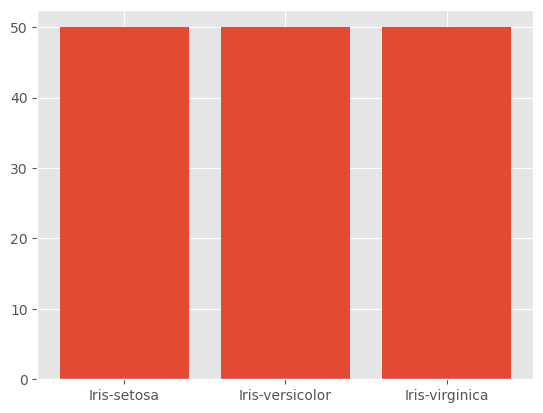

In [50]:
plt.bar(height = df_iris['species'].value_counts().values , x = df_iris['species'].value_counts().index )
plt.show()

## `Data is unbaised`

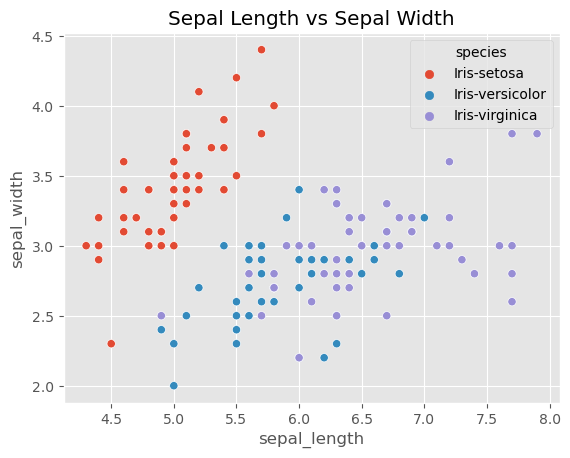

In [22]:
sns.scatterplot(data=df_iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

C:\Users\Osama Sabry\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


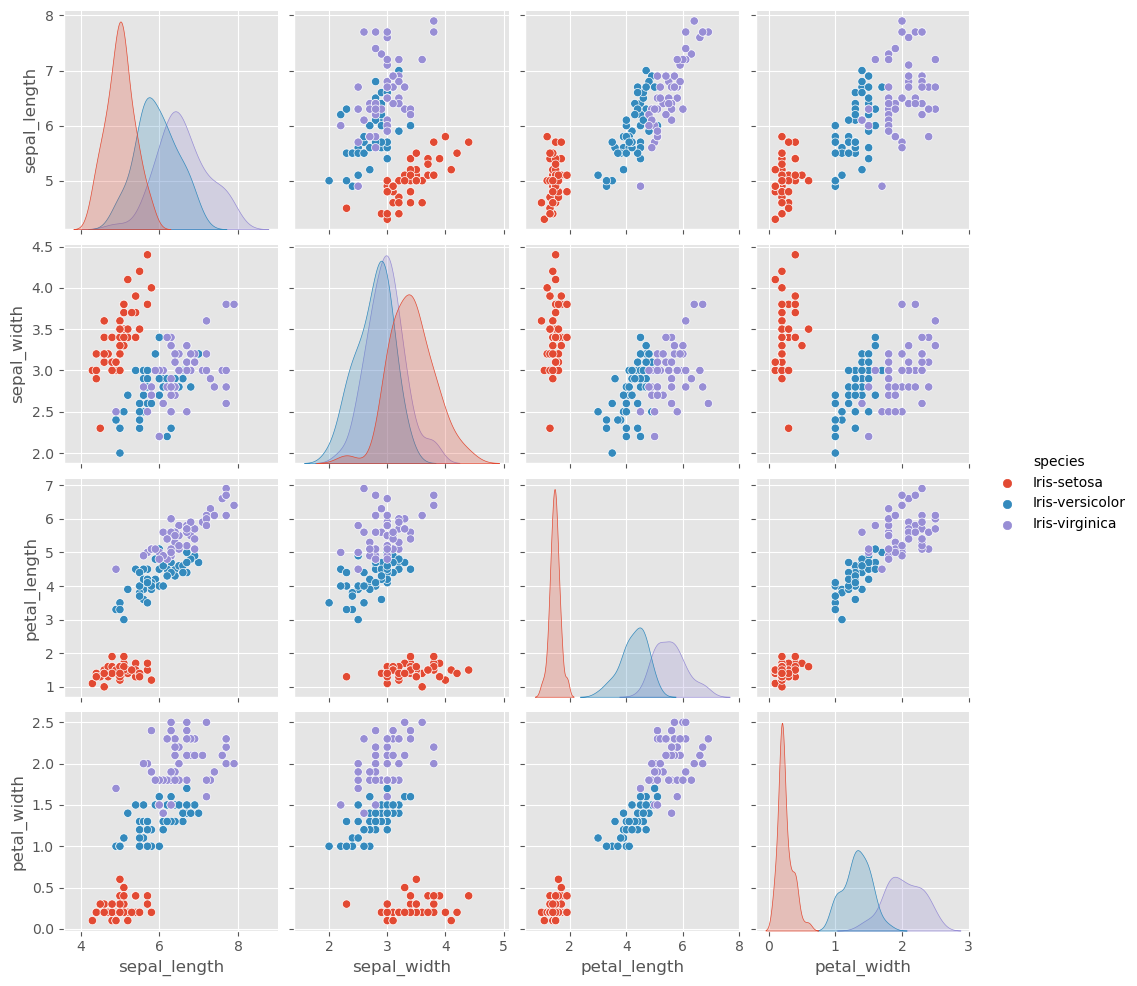

In [24]:
sns.pairplot(df_iris, hue='species')
plt.show()

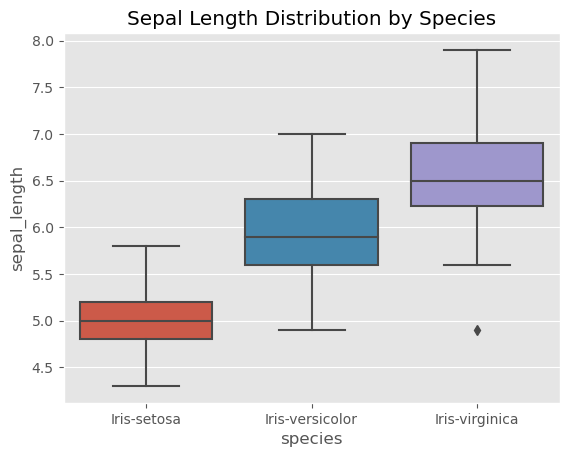

In [25]:
sns.boxplot(data=df_iris, x='species', y='sepal_length')
plt.title('Sepal Length Distribution by Species')
plt.show()

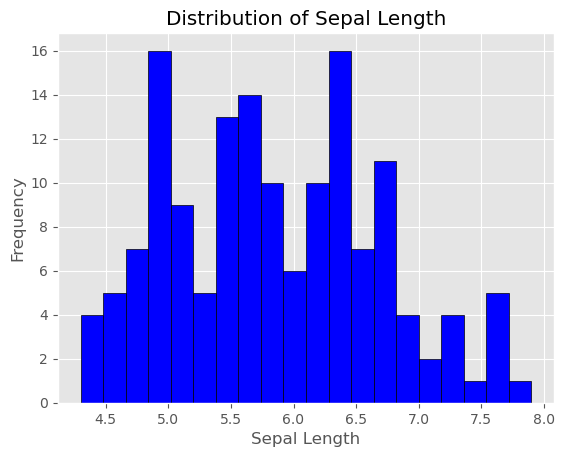

In [26]:
plt.hist(df_iris['sepal_length'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

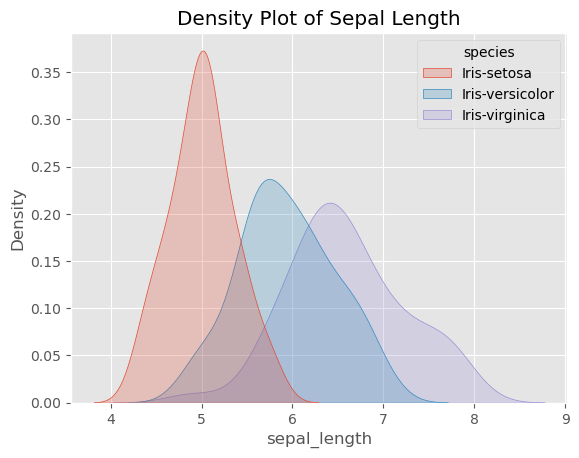

In [28]:
sns.kdeplot(data=df_iris, x='sepal_length', hue='species', fill=True)
plt.title('Density Plot of Sepal Length')
plt.show()

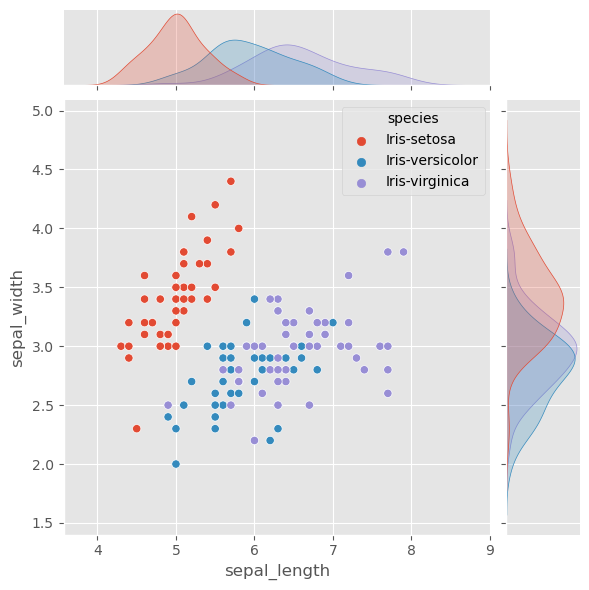

In [31]:
# Joint plot with Seaborn
sns.jointplot(data=df_iris, x='sepal_length', y='sepal_width', hue='species', kind='scatter')
plt.show()

# `Stripplot is the best Visulaization Method On Iris `

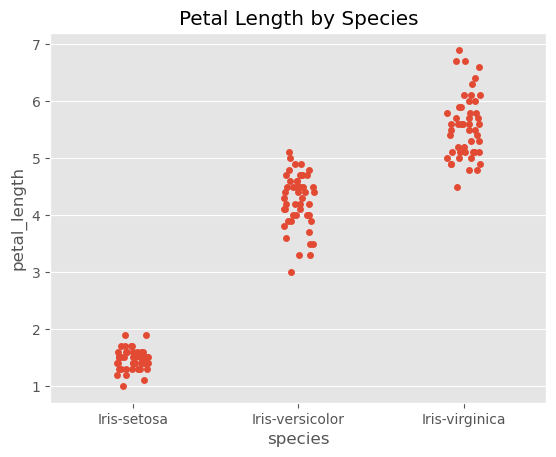

In [36]:
sns.stripplot(data=df_iris, x='species', y='petal_length', jitter=True)
plt.title('Petal Length by Species')
plt.show()

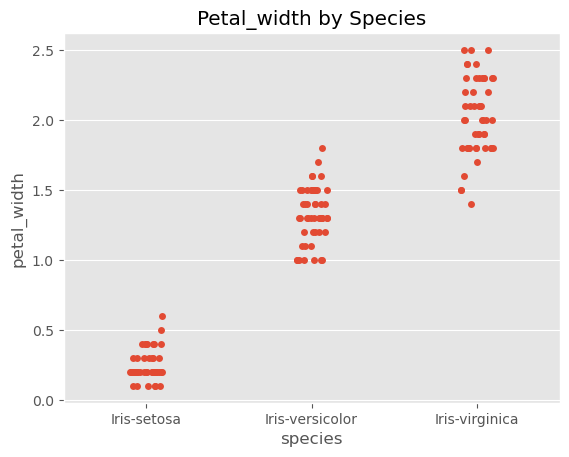

In [46]:
sns.stripplot(data=df_iris, x='species', y='petal_width', jitter=True)
plt.title('Petal_width by Species')
plt.show()

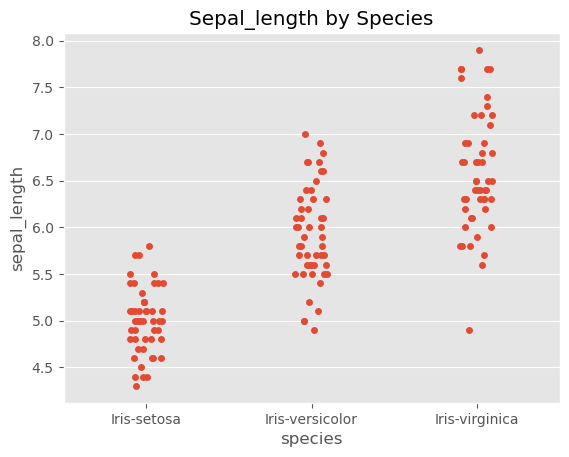

In [47]:
sns.stripplot(data=df_iris, x='species', y='sepal_length', jitter=True)
plt.title('Sepal_length by Species')
plt.show()


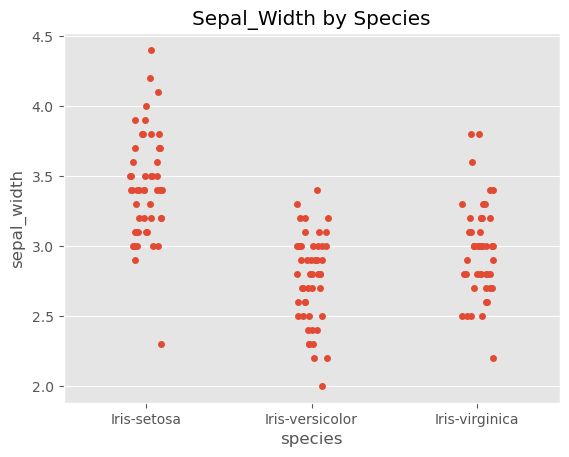

In [48]:
sns.stripplot(data=df_iris, x='species', y='sepal_width', jitter=True)
plt.title('Sepal_Width by Species')
plt.show()

## ` The Petal length & Width are the Best features to make Classifaction`

In [53]:
X = df_iris.drop(columns='species')
y = df_iris['species']

In [54]:
std = StandardScaler()

In [55]:
X = std.fit_transform(X)

In [56]:
X_train , X_test , y_train , y_test = train_test_split(X,y)

In [57]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

112
38
112
38


# Machine Learning

In [135]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [136]:
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

print('Accuracy Score on Training ', accuracy_score(y_train,y_train_pred_knn))
print('Accuracy Score on Test     ', accuracy_score(y_test,y_test_pred_knn))

Accuracy Score on Training  0.9523809523809523
Accuracy Score on Test      1.0


In [137]:
print('Precision Score  on Training ', precision_score(y_train,y_train_pred_knn , average=None))
print('Precision Score  on Test     ', precision_score(y_test,y_test_pred_knn ,average=None))

Precision Score  on Training  [1.         0.97058824 0.9       ]
Precision Score  on Test      [1. 1. 1.]


In [138]:
print('Recall Score  on Training ', recall_score(y_train,y_train_pred_knn , average=None))
print('Recall Score  on Test     ', recall_score(y_test,y_test_pred_knn ,average=None))

Recall Score  on Training  [1.         0.89189189 0.97297297]
Recall Score  on Test      [1. 1. 1.]


# DONE